In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np


file_name=r"D:\Notebooks\data\Classification-Project-Finding-Donors-For-Charity\adult.data"

df=pd.read_csv(file_name)

In [2]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']  

In [4]:
df=pd.DataFrame(df.values,columns=column_names)

In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [9]:
df['age'].min()

17

In [10]:
df['age'].max()

90

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  object
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  object
 3   education       32560 non-null  object
 4   education-num   32560 non-null  object
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  object
 11  capital-loss    32560 non-null  object
 12  hours-per-week  32560 non-null  object
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [12]:
df=df.infer_objects()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df['Income']=df['Income'].str.strip()

In [15]:
df['Income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: Income, Length: 32560, dtype: object

In [16]:
n_records=df.shape[0]

n_greater_50k=df[df['Income']=='>50K'].shape[0]

n_at_most_50k=df[df['Income']=='<=50K'].shape[0]

greater_percent=(n_greater_50k/n_records)*100



In [17]:
n_records

32560

In [18]:
print('Individuals making more than 50K:{}'.format(n_greater_50k))

Individuals making more than 50K:7841


In [19]:
print('Individuals making less than 50K or equal to 50K:{}'.format(n_at_most_50k))

Individuals making less than 50K or equal to 50K:24719


In [20]:
greater_percent

24.081695331695332

In [21]:
#Vistalizations

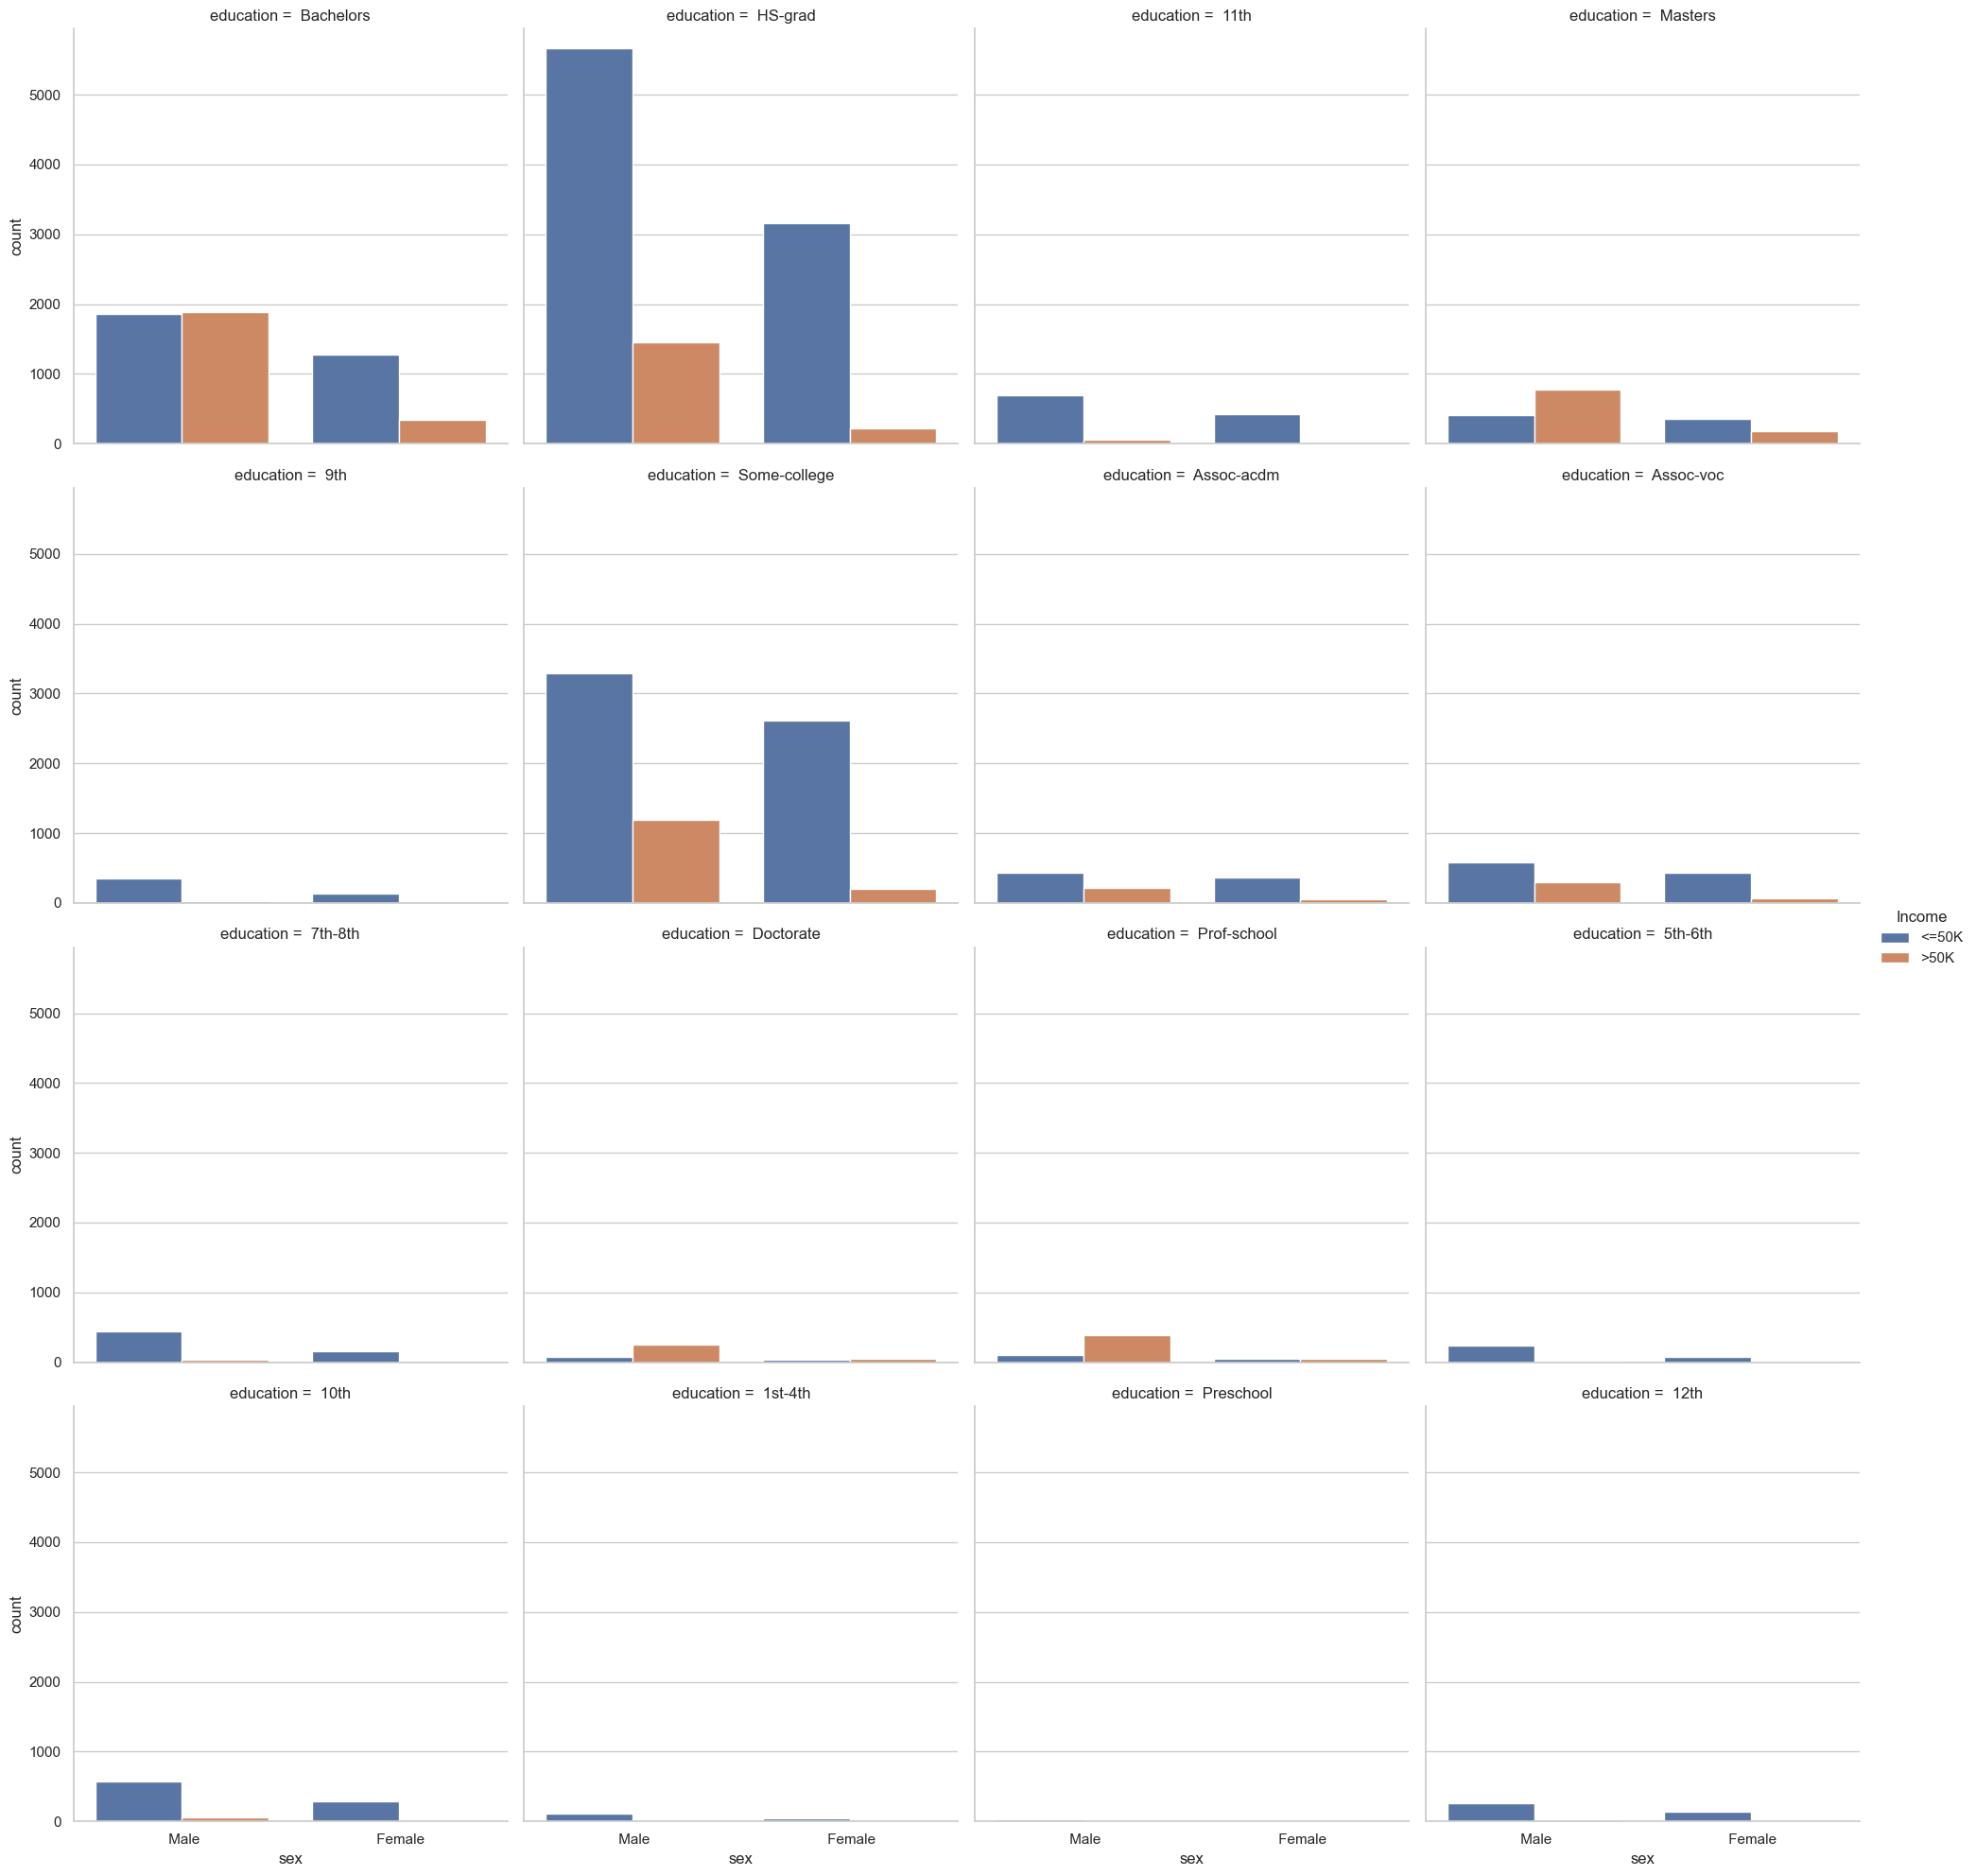

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', color_codes=True)
sns.catplot(x="sex", col='education', data=df, hue='Income', kind='count', col_wrap=4)
plt.show()


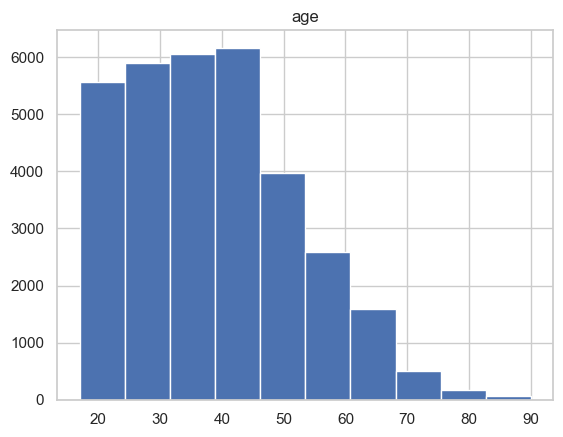

In [23]:
df.hist(column='age')
plt.show()

In [24]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [25]:
df[df['occupation']==' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [26]:
df[df['workclass']==' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [27]:
df=df[df['workclass']!= ' ?']
df=df[df['occupation']!=' ?']
df=df[df['native-country']!=' ?']

In [28]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
#Prepare our data for Modelling/Preprocessing

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']
df[numerical]=scaler.fit_transform(df[numerical])

In [31]:
df[numerical]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.452055,0.800000,0.000000,0.0,0.122449
1,0.287671,0.533333,0.000000,0.0,0.397959
2,0.493151,0.400000,0.000000,0.0,0.397959
3,0.150685,0.800000,0.000000,0.0,0.397959
4,0.273973,0.866667,0.000000,0.0,0.397959
...,...,...,...,...,...
32555,0.136986,0.733333,0.000000,0.0,0.377551
32556,0.315068,0.533333,0.000000,0.0,0.397959
32557,0.561644,0.533333,0.000000,0.0,0.397959
32558,0.068493,0.533333,0.000000,0.0,0.193878


In [32]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32556,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32557,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32558,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [33]:
y=df['Income']

In [34]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Income, dtype: object

In [35]:
df.drop('Income',axis=1,inplace=True)

In [36]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States
32556,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States
32557,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States
32558,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States


In [37]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: Income, Length: 30161, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=y.apply(lambda x:0 if x=='<=50K' else 1)

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30161, dtype: int64

In [40]:
X = pd.get_dummies(df)
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.452055,0.800000,0.000000,0.0,0.122449,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.493151,0.400000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.150685,0.800000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.273973,0.866667,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.733333,0.000000,0.0,0.377551,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32556,0.315068,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.561644,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.068493,0.533333,0.000000,0.0,0.193878,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
Y_test

27340    0
20331    0
9084     0
19697    0
17984    0
        ..
30924    0
15972    0
22369    0
20830    0
9284     0
Name: Income, Length: 9049, dtype: int64

In [43]:
Y_train

8841     0
7734     0
473      0
5923     0
7096     0
        ..
14169    0
21206    0
10647    0
11688    0
2976     1
Name: Income, Length: 21112, dtype: int64

In [44]:
X_test

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
27340,0.054795,0.533333,0.00000,0.0,0.602041,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
20331,0.054795,0.400000,0.00000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
9084,0.205479,0.666667,0.00000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
19697,0.356164,0.600000,0.00000,0.0,0.193878,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17984,0.369863,0.600000,0.03411,0.0,0.397959,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30924,0.095890,0.600000,0.00000,0.0,0.397959,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
15972,0.260274,0.600000,0.00000,0.0,0.448980,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
22369,0.438356,0.200000,0.00000,0.0,0.346939,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
20830,0.273973,0.533333,0.00000,0.0,0.479592,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [45]:
#Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_split=90,max_depth=11,criterion='gini')
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))

0.8629689276241


In [47]:
prediction=dt.predict(X_test)

In [48]:
list(prediction)


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [49]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [50]:
accuracy_dt

84.99281688584374

In [51]:
dt.predict(X_test[2:3])

array([0], dtype=int64)

In [52]:
#HyperTuning of DT

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters={'min_samples_split':range(10,500,20),'max_depth':range(1,20,2),'criterion':['gini','entropy']}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)})

In [55]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_split=90)

In [56]:
clf_predict=clf.predict(X_test)

In [57]:
accuracy_score(clf_predict,Y_test)

0.850259697204111

In [58]:
#Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=100,solver='newton-cg')
log.fit(X_train,Y_train)
print(log.score(X_train,Y_train))
log

0.848664266767715


LogisticRegression(C=100, solver='newton-cg')

In [60]:
log_test=log.predict(X_test)

In [61]:
log_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
accuracy_score(log_test,Y_test)

0.8492651121670903

In [63]:
log.predict(X_test[2:3])

array([0], dtype=int64)

In [64]:
model=LogisticRegression(max_iter=1000)
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100, 10, 1.0, 0.1, 0.01, 0.001]

parameters=dict(solver=solvers,penalty=penalty,C=c_values)

grid_search_log=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
grid_search_log.fit(X_train,Y_train)

D:\Shanu_user\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [65]:
grid_search_log.best_estimator_

LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

In [66]:
grid_search_log.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [67]:
grid_log=grid_search_log.predict(X_test)

In [68]:
accuracy_score(grid_log,Y_test)

0.8492651121670903